# Final Project
Ava Downey, Steve Rimdzius \
May 10, 2022

In [1]:
# load and clean the dataset

set.seed(69)

submission <- read.csv('data/submission.csv')
data <- read.csv('data/train.csv')

index = sample(1:nrow(data),
               size = 0.70*nrow(data))
train = data[index,]
test = data[-index,]

drop <- c("Artist.Name", "Track.Name")
train = train[,!(names(train) %in% drop)]
test = test[,!(names(test) %in% drop)]
train = na.omit(train)
test = na.omit(test)

index2 = sample(1:nrow(test),
               size = 0.30*nrow(test))
validate = data[index,]
test = data[-index,]

colnames(train)
colnames(submission)

head(train)

[1] "Popularity"         "danceability"       "energy"            
 [4] "key"                "loudness"           "mode"              
 [7] "speechiness"        "acousticness"       "instrumentalness"  
[10] "liveness"           "valence"            "tempo"             
[13] "duration_in.min.ms" "time_signature"     "Class"

[1] "Acoustic.Folk_0" "Alt_Music_1"     "Blues_2"         "Bollywood_3"    
 [5] "Country_4"       "HipHop_5"        "Indie.Alt_6"     "Instrumental_7" 
 [9] "Metal_8"         "Pop_9"           "Rock_10"

Popularity danceability energy key loudness mode speechiness acousticness
2016  41         0.459        0.677  7    -5.719  1    0.0626      3.73e-02    
17617 31         0.724        0.550  2   -10.160  1    0.0319      6.55e-04    
11213 29         0.641        0.939  2    -7.822  1    0.0571      2.23e-04    
1447  35         0.477        0.290  4   -18.066  1    0.0374      5.54e-01    
17026  9         0.373        0.245  3   -10.094  0    0.0326      9.93e-01    
17307 57         0.429        0.993  2    -2.772  1    0.1570      4.65e-05    
      instrumentalness liveness valence tempo   duration_in.min.ms
2016  0.000587         0.1200   0.1460  160.154 2.445000e+05      
17617 0.016900         0.0697   0.2540  132.981 1.804510e+05      
11213 0.871000         0.0777   0.0963  128.015 4.126030e+05      
1447  0.178000         0.2830   0.7270  122.589 2.152030e+05      
17026 0.024600         0.0978   0.6370  130.750 3.354217e+00      
17307 0.762000         0.1630   0.2560  172.080 2.324250e+05      
      time_signature Class
2016  4              10   
17617 4              10   
11213 4               6   
1447  3               2   
17026 4               3   
17307 4              10

In [2]:
# correlation matrix
library("dplyr")

cord <- cor(train)
cord %>%                              
  as.table() %>% as.data.frame() %>%       
  subset(Var1 != Var2 & abs(Freq)>0.5) %>% 
  filter(!duplicated(paste0(pmax(as.character(Var1), as.character(Var2)), pmin(as.character(Var1), as.character(Var2))))) %>%
                                          
  arrange(desc(Freq))

cord


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Var1         Var2     Freq      
1 loudness     energy    0.7912061
2 acousticness loudness -0.6419642
3 acousticness energy   -0.7603753

Popularity   danceability energy      key          
Popularity          1.000000000  0.135368140  0.05656356  0.0050644091
danceability        0.135368140  1.000000000 -0.09971167 -0.0072183032
energy              0.056563556 -0.099711670  1.00000000  0.0387582230
key                 0.005064409 -0.007218303  0.03875822  1.0000000000
loudness            0.106298647  0.042855047  0.79120614  0.0199560455
mode                0.019132710 -0.047146964 -0.04316600 -0.1201314528
speechiness         0.003167853  0.111076363  0.18126570  0.0007264096
acousticness       -0.126703279  0.030531450 -0.76037530 -0.0238747705
instrumentalness   -0.169825020 -0.200548035 -0.17357014 -0.0047140566
liveness           -0.080494483 -0.123110037  0.20059230  0.0204266569
valence             0.048929555  0.451615625  0.20085125  0.0329426232
tempo              -0.011640151 -0.176917126  0.22450395  0.0180594370
duration_in.min.ms  0.007590939 -0.121631845  0.26187513  0.0180974078
time_signature      0.056962975  0.119031015  0.14400303  0.0109923714
Class               0.175579311 -0.123904617  0.22276402 -0.0083309563
                   loudness    mode         speechiness   acousticness
Popularity          0.10629865  0.019132710  0.0031678534 -0.12670328 
danceability        0.04285505 -0.047146964  0.1110763633  0.03053145 
energy              0.79120614 -0.043166001  0.1812656980 -0.76037530 
key                 0.01995605 -0.120131453  0.0007264096 -0.02387477 
loudness            1.00000000 -0.036126089  0.1318095482 -0.64196418 
mode               -0.03612609  1.000000000 -0.0314838070  0.03076259 
speechiness         0.13180955 -0.031483807  1.0000000000 -0.10099317 
acousticness       -0.64196418  0.030762585 -0.1009931669  1.00000000 
instrumentalness   -0.34229239 -0.013861975 -0.0817424735  0.16935442 
liveness            0.11955698 -0.020031614  0.0826552904 -0.11543921 
valence             0.17471827 -0.003900224 -0.0001083194 -0.12148126 
tempo               0.18135978  0.012675611  0.0818413972 -0.18348692 
duration_in.min.ms  0.21430902 -0.062602166  0.0075825296 -0.35337985 
time_signature      0.12075681 -0.012463844  0.0602426953 -0.13145460 
Class               0.17257582 -0.047787380 -0.0083962023 -0.24975327 
                   instrumentalness liveness     valence       tempo      
Popularity         -0.169825020     -0.080494483  0.0489295553 -0.01164015
danceability       -0.200548035     -0.123110037  0.4516156247 -0.17691713
energy             -0.173570141      0.200592296  0.2008512547  0.22450395
key                -0.004714057      0.020426657  0.0329426232  0.01805944
loudness           -0.342292392      0.119556975  0.1747182745  0.18135978
mode               -0.013861975     -0.020031614 -0.0039002241  0.01267561
speechiness        -0.081742473      0.082655290 -0.0001083194  0.08184140
acousticness        0.169354421     -0.115439207 -0.1214812591 -0.18348692
instrumentalness    1.000000000     -0.037611228 -0.2274894296 -0.02958014
liveness           -0.037611228      1.000000000  0.0066232328  0.03338583
valence            -0.227489430      0.006623233  1.0000000000  0.05182861
tempo              -0.029580145      0.033385827  0.0518286149  1.00000000
duration_in.min.ms -0.015025492      0.060296160 -0.1031372216  0.06194269
time_signature     -0.075089363      0.013753806  0.1074101386 -0.03663190
Class              -0.035687044      0.028410693 -0.1107626362  0.04250603
                   duration_in.min.ms time_signature Class       
Popularity          0.007590939        0.056962975    0.175579311
danceability       -0.121631845        0.119031015   -0.123904617
energy              0.261875130        0.144003030    0.222764016
key                 0.018097408        0.010992371   -0.008330956
loudness            0.214309023        0.120756815    0.172575820
mode               -0.062602166       -0.012463844   -0.047787380
speechiness         0.007582530        0.060242695   -0.008396202
acousticness       

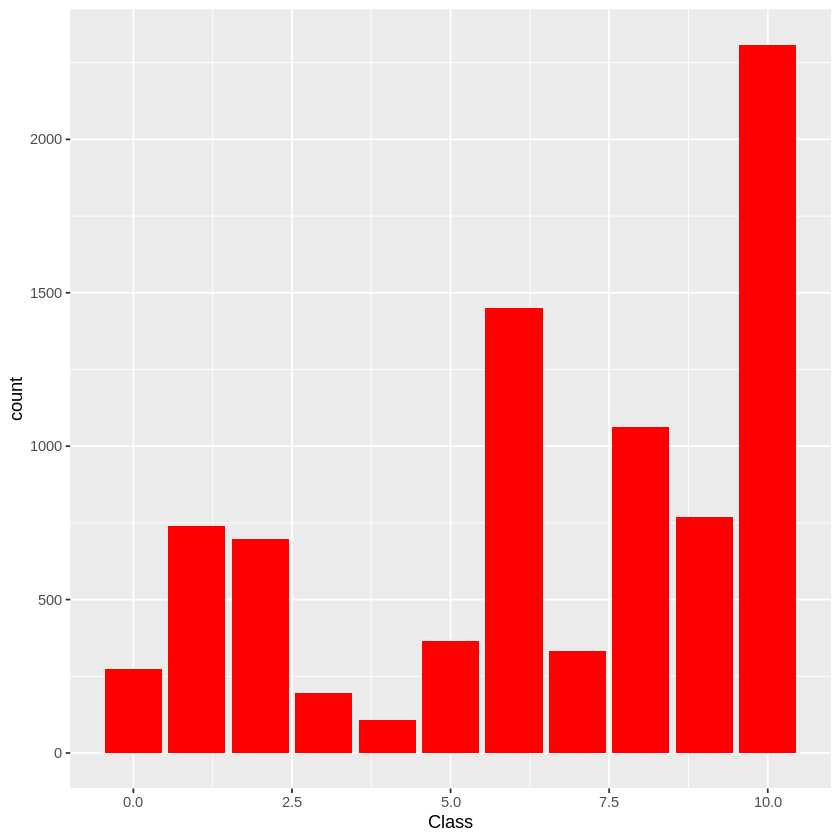

In [3]:
# histogram
library("ggplot2")

ggplot(train, aes(x=Class)) + geom_bar(fill="red")

# since the data is not evenly distributed among each genre of music, 
# F1 score will be a more useful metric than accuracy

In [4]:
f1_score <- function(predicted, expected, positive.class="1") {
    predicted <- factor(as.character(predicted), levels=unique(as.character(expected)))
    expected  <- as.factor(expected)
    cm = as.matrix(table(expected, predicted))

    precision <- diag(cm) / colSums(cm)
    recall <- diag(cm) / rowSums(cm)
    f1 <-  ifelse(precision + recall == 0, 0, 2 * precision * recall / (precision + recall))

    #Assuming that F1 is zero when it's not possible compute it
    f1[is.na(f1)] <- 0

    #Binary F1 or Multi-class macro-averaged F1
    ifelse(nlevels(expected) == 2, f1[positive.class], mean(f1))
}

# Logistic Regression

In [5]:
# logistic regression with everything

L <- glm(Class ~ Popularity + danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_in.min.ms + time_signature, data=train)
P <- predict(L, test,type='response')
P <- round(P)

summary(P)
summary(L)
f1_score(P, test$Class)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.000   6.000   7.000   6.592   7.000  11.000    1895 


Call:
glm(formula = Class ~ Popularity + danceability + energy + key + 
    loudness + mode + speechiness + acousticness + instrumentalness + 
    liveness + valence + tempo + duration_in.min.ms + time_signature, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7700  -1.6517   0.3976   2.4933   6.9129  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.681e+00  5.178e-01   9.041  < 2e-16 ***
Popularity          3.264e-02  2.072e-03  15.755  < 2e-16 ***
danceability       -1.282e+00  2.501e-01  -5.125 3.05e-07 ***
energy              2.013e+00  2.930e-01   6.872 6.78e-12 ***
key                -2.102e-02  1.063e-02  -1.978 0.047969 *  
loudness           -2.842e-02  1.383e-02  -2.056 0.039816 *  
mode               -2.894e-01  6.963e-02  -4.157 3.26e-05 ***
speechiness        -1.859e+00  5.140e-01  -3.615 0.000302 ***
acousticness       -1.165e+00  1.682e-01  -6.931 4.50e-12 ***
instrumentalness  

[1] 0.08879553

In [6]:
# logistic regression with high correlation vars

L <- glm(Class ~  duration_in.min.ms+loudness+energy  + acousticness*loudness+ loudness*energy + acousticness*energy, data=train)
P <- predict(L,test,type='response')
P <- round(P)

summary(P)
summary(L)
f1_score(P, test$Class)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.000   6.525   7.000  11.000 


Call:
glm(formula = Class ~ duration_in.min.ms + loudness + energy + 
    acousticness * loudness + loudness * energy + acousticness * 
    energy, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.0615  -1.5813   0.3106   2.5887   6.3452  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.197e+00  5.164e-01   6.191 6.26e-10 ***
duration_in.min.ms     4.065e-06  3.153e-07  12.892  < 2e-16 ***
loudness              -1.692e-01  4.769e-02  -3.547 0.000391 ***
energy                 4.514e+00  5.576e-01   8.096 6.48e-16 ***
acousticness           1.734e+00  7.736e-01   2.241 0.025061 *  
loudness:acousticness  1.203e-01  5.262e-02   2.286 0.022272 *  
loudness:energy        3.232e-01  5.651e-02   5.720 1.10e-08 ***
energy:acousticness   -4.507e+00  7.467e-01  -6.036 1.64e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 9

[1] 0.06744028

## Logistic Regression Analysis

Logistic regression does not perform well with this dataset. This is because there is very low linear correlation between the predictors and the target variable. This is shown through the F1 score of the logistic regression models above. By running all of the terms together, an F1 score of .089, and by picking out high signifigance interaction terms, an F1 score of 0.067 was achieved. There will be better models for predicting type of music based off of this data.

# Random Forest

In [7]:
library("randomForest")

train$Class <- as.factor(train$Class)
test$Class = as.factor(test$Class)
F <- randomForest(Class ~ .,data=train)
rf.pred <- predict(F,test)

f1_score(rf.pred, test$Class)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




[1] 0.2327625

## Random Forest Analysis

The F1 score for random forest was .233, which is not great but it signifigantly better than the F1 score from logistic regression models. This might be because the correlation between the variables in this dataset does not appear to be linear.

# Neural Network

In [8]:
library("keras")

In [9]:
train_y = train$Class
drop <- c("Class")
train_x = train[,!(names(train) %in% drop)]
validate_x = validate[,!(names(validate) %in% drop)]
validate_y = validate$Class

In [10]:
#set the structure or topology of the MLNN
modnn <- keras_model_sequential() %>%
  layer_dense(units=50,activation="relu",input_shape=ncol(train)) %>%
  layer_dropout(rate=0.4) %>%
  layer_dense(units=11,activation='softmax')
modnn %>% compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer_adam(),
                  metrics = 'accuracy')
#check it to make sure it is valid...
summary(modnn)

Loaded Tensorflow version 2.8.0



Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 50)                      800         
                                                                                
 dropout (Dropout)                  (None, 50)                      0           
                                                                                
 dense (Dense)                      (None, 11)                      561         
                                                                                
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
________________________________________________________________________________


In [11]:
train_y <- to_categorical(train_y)
validate_y <- to_categorical(validate_y)

In [12]:
#fit the model-----------------------------------------------------
history <- modnn %>% fit(x=train_x, y=train_y, 
                         epochs=1500, batch_size=32,
                         validation_data = list(validate_x, validate_y))
plot(history)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: in user code:

    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/input_spec.py", line 183, in assert_input_compatibility
        raise ValueError(f'Missing data for input "{name}". '

    ValueError: Missing data for input "dense_1_input". You passed a data dictionary with keys ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in.min.ms', 'time_signature']. Expected the following keys: ['dense_1_input']


Detailed traceback:
  File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/framework/func_graph.py", line 1147, in autograph_handler
    raise e.ag_error_metadata.to_exception(e)



## Neural Network Analysis